In [20]:
import glob
import pandas as pd
import matplotlib.pyplot as plt

# Helper Functions

In [30]:
def load_fer_output_data(path):
    csv_files = glob.glob(path + "/*.csv")
    csv_files.sort()

    df_list = (pd.read_csv(file) for file in csv_files)
    
    # Concatenate all DataFrames
    df = pd.concat(df_list, ignore_index=True)
    df.columns = ['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'neutral']
    df['start']= [0.1*count for count in range(len(df))]
    df['end'] = [0.1*count for count in range(1,len(df)+1)]

    return df


In [21]:
def single_emotion_line_plot(df, title):
    fig, axs = plt.subplots(2, 4, figsize=(10, 5))
    fig.suptitle(title)

    fig.supxlabel('Time in s for conversation start')
    fig.supylabel('Emotion intensity')
    
    # Plot line plots on each subplot
    axs[0, 0].plot(df.start/60, df['joy'])
    axs[0, 0].set_title('Joy')
    axs[0, 0].set_ylim(0,1)

    axs[0, 1].plot(df.start/60, df['fear'])
    axs[0, 1].set_title('fear')
    axs[0, 1].set_ylim(0,1)

    axs[0, 2].plot(df.start/60, df['anger'])
    axs[0, 2].set_title('Anger')
    axs[0, 2].set_ylim(0,1)

    axs[0, 3].plot(df.start/60, df['disgust'])
    axs[0, 3].set_title('Disgust')
    axs[0, 3].set_ylim(0,1)

    axs[1, 0].plot(df.start/60, df['surprise'])
    axs[1, 0].set_title('Surprise')
    axs[1, 0].set_ylim(0,1)

    axs[1, 1].plot(df.start/60, df['sadness'])
    axs[1, 1].set_title('Sadness')
    axs[1, 1].set_ylim(0,1)

    
    axs[1, 2].plot(df.start/60, df['neutral'])
    axs[1, 2].set_title('Neutral')
    axs[1, 2].set_ylim(0,1)

    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the plot
    plt.show()

In [38]:
def all_emotions_line_plot(df, title):
    plt.figure(figsize=(15, 4))
    plt.plot(df.start/60, df['joy'], label = "joy")
    plt.plot(df.start/60, df['fear'], label = "fear")
    plt.plot(df.start/60, df['neutral'], label = "neutral")
    plt.plot(df.start/60, df['disgust'], label = "disgust")
    plt.plot(df.start/60, df['anger'], label = "anger")
    plt.plot(df.start/60, df['surprise'], label = "surprise")
    plt.plot(df.start/60, df['sadness'], label = "sadness")
    plt.legend()
    plt.title(title)
    plt.show()

In [24]:
def pie_plot_total_emotions(df_morning, df_afternoon, title):
   
    labels = ['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'neutral']
    
    sizes_afternoon = [df_afternoon.sum()[label] for label in labels]
    sizes_morning = [df_morning.sum()[label] for label in labels]

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    fig.suptitle(title)
    axs[0].pie(sizes_morning, labels=labels, autopct='%1.1f%%')
    axs[0].set_title('Morning')

    axs[1].pie(sizes_afternoon, labels=labels, autopct='%1.1f%%')
    axs[1].set_title('Afternoon')

In [25]:
def calculate_highest_emotion(df):
    df_new = df.copy()
    max_values = df_new.iloc[:,3:].max(axis=1)
    df_new[['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise']] = df_new[['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise']].eq(max_values, axis=0).astype(int)
    return df_new

# Cuban Vocals

In [32]:
df_vocals_afternoon = load_fer_output_data('../data/FER_Output/1_jazzaar-afternoon-JFLB-Cuban-Vocals-video/1_csv')
df_vocals_morning = load_fer_output_data('../data/FER_Output/2_jazzaar-20230417-morning-JFLB-Cuban-Vocals-video Philipp/2_csv')

df_vocals_afternoon_abs = calculate_highest_emotion(df_vocals_afternoon)
df_vocals_morning_abs = calculate_highest_emotion(df_vocals_morning)

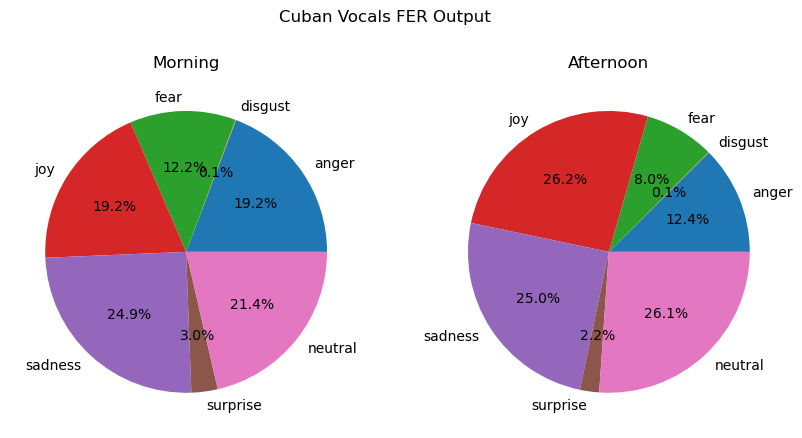

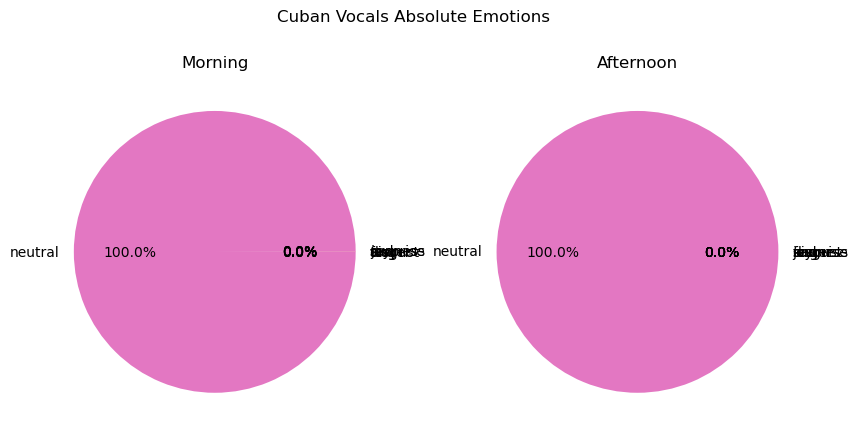

In [36]:
pie_plot_total_emotions(df_vocals_morning, df_vocals_afternoon, "Cuban Vocals FER Output")
pie_plot_total_emotions(df_vocals_morning_abs, df_vocals_afternoon_abs, "Cuban Vocals Absolute Emotions")

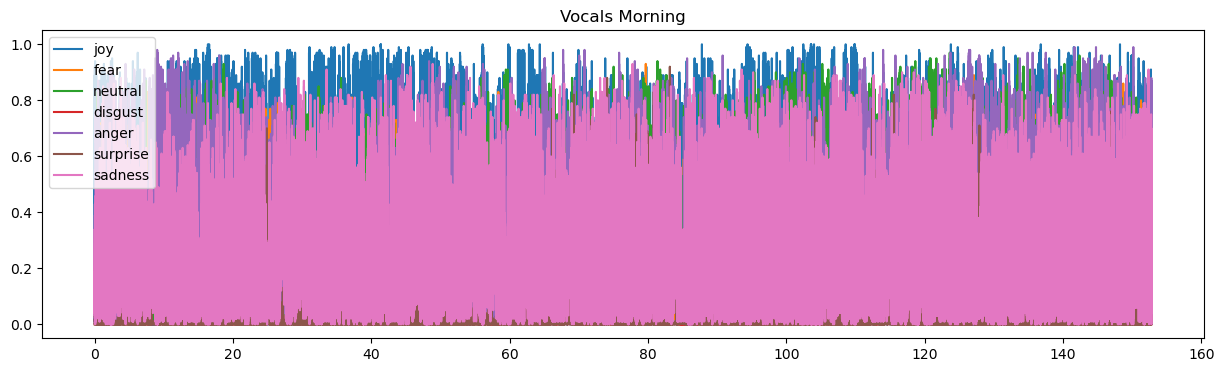

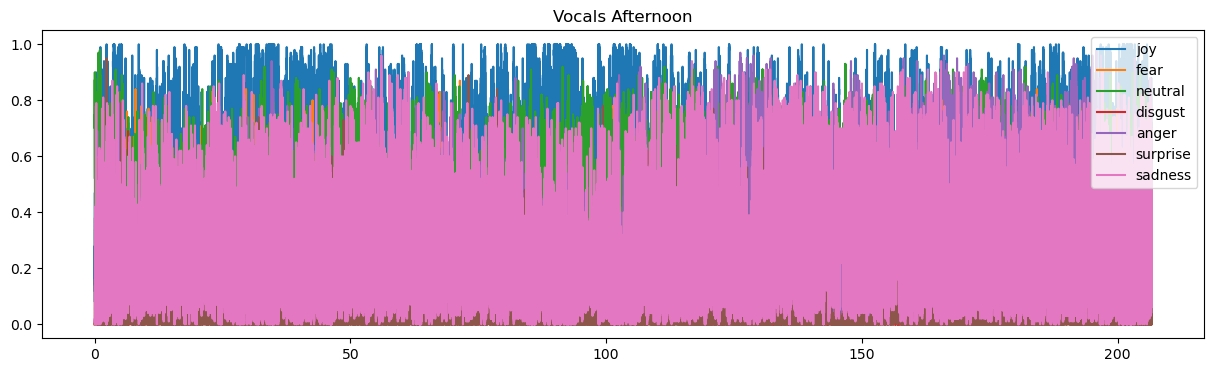

In [39]:
all_emotions_line_plot(df_vocals_morning, "Vocals Morning")
all_emotions_line_plot(df_vocals_afternoon, "Vocals Afternoon")

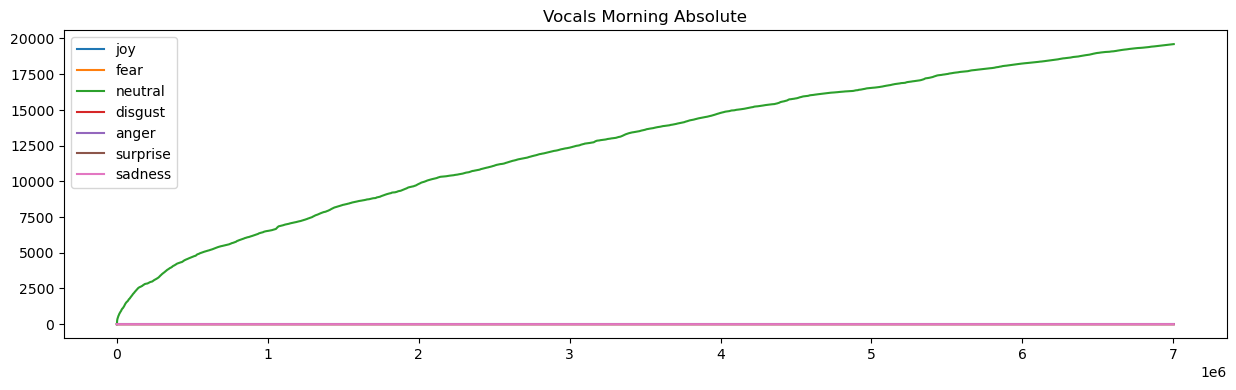

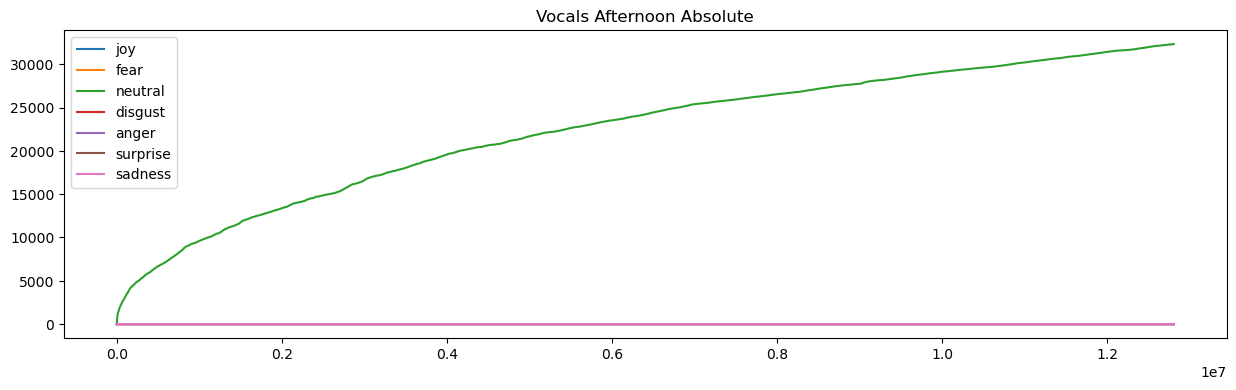

In [40]:
all_emotions_line_plot(df_vocals_morning_abs.cumsum(), "Vocals Morning Absolute")
all_emotions_line_plot(df_vocals_afternoon_abs.cumsum(), "Vocals Afternoon Absolute")


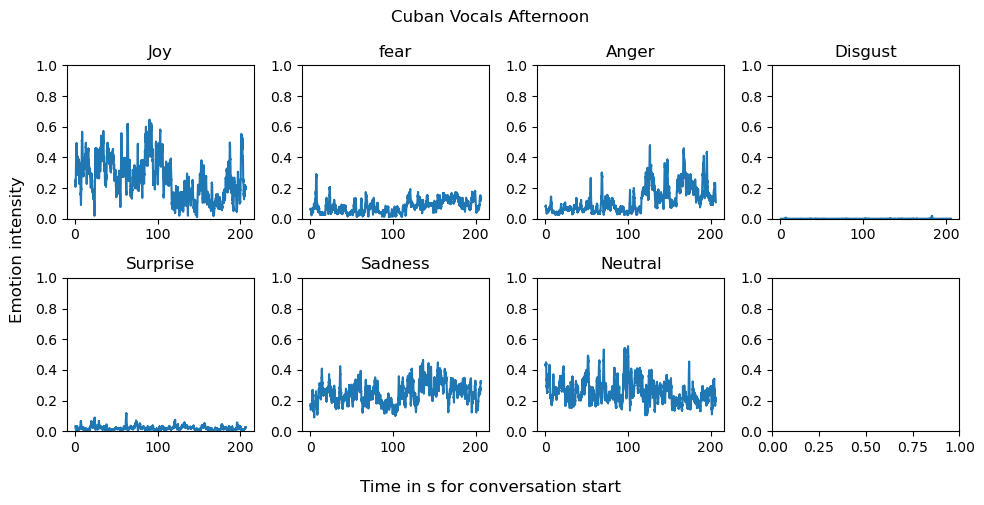

In [44]:
single_emotion_line_plot(df_vocals_afternoon.rolling(600).mean(), "Cuban Vocals Afternoon")